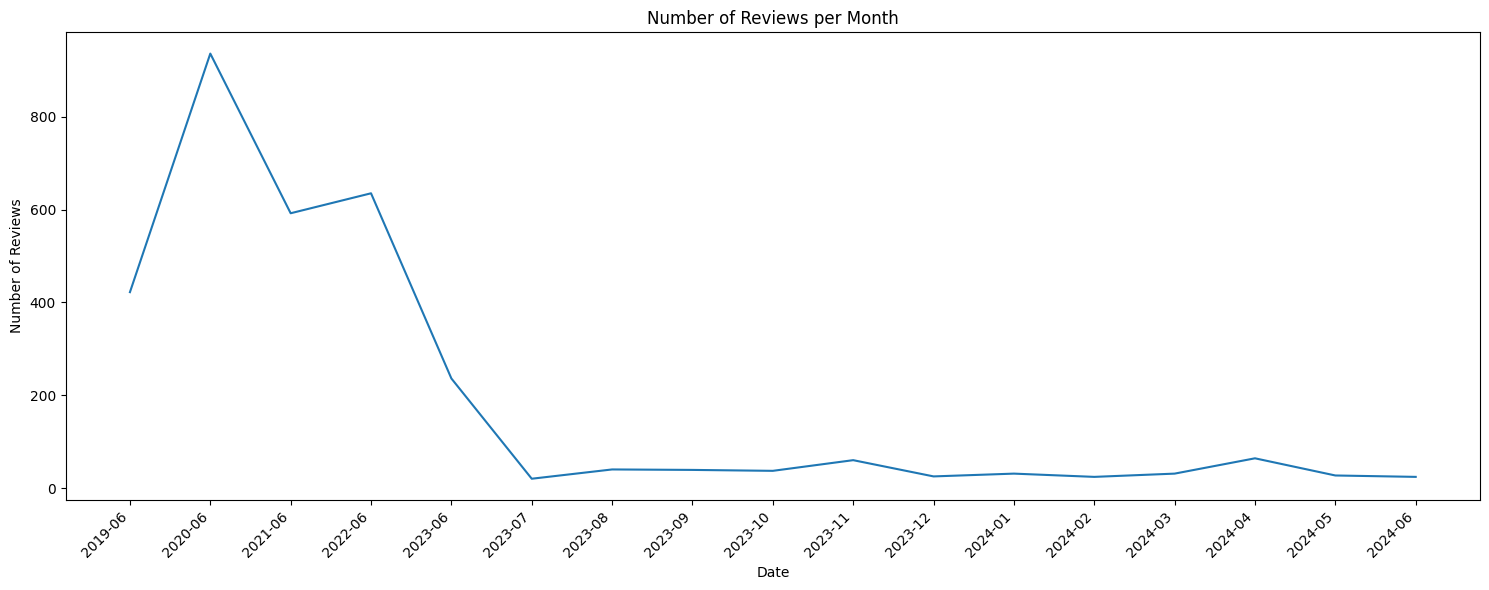

Total number of reviews: 3243
Date range: from 2019-06-29 to 2024-06-28
Month with most reviews: 2020-06 (936 reviews)
Month with least reviews: 2023-07 (20 reviews)
Average reviews per month: 190.76


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# Load the data
df = pd.read_csv('karcher_reviews.csv')

# Function to convert relative date to actual date
def convert_relative_date(date_str, reference_date):
    if 'day ago' in date_str or 'days ago' in date_str:
        days = 1 if date_str == 'a day ago' else int(re.search(r'\d+', date_str).group())
        return reference_date - pd.Timedelta(days=days)
    elif 'month ago' in date_str or 'months ago' in date_str:
        months = 1 if date_str == 'a month ago' else int(re.search(r'\d+', date_str).group())
        return reference_date - pd.DateOffset(months=months)
    elif 'year ago' in date_str or 'years ago' in date_str:
        years = 1 if date_str == 'a year ago' else int(re.search(r'\d+', date_str).group())
        return reference_date - pd.DateOffset(years=years)
    else:
        return pd.to_datetime(date_str)

# Set the reference date (today's date in the context)
reference_date = datetime(2024, 6, 29)

# Create new date column
df['actual_date'] = df['date'].apply(lambda x: convert_relative_date(x, reference_date))

# Convert to datetime and extract year-month
df['year_month'] = df['actual_date'].dt.to_period('M')

# Count reviews per month
reviews_per_month = df['year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x=reviews_per_month.index.astype(str), y=reviews_per_month.values)
plt.title('Number of Reviews per Month')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of reviews: {len(df)}")
print(f"Date range: from {df['actual_date'].min().strftime('%Y-%m-%d')} to {df['actual_date'].max().strftime('%Y-%m-%d')}")
print(f"Month with most reviews: {reviews_per_month.idxmax()} ({reviews_per_month.max()} reviews)")
print(f"Month with least reviews: {reviews_per_month.idxmin()} ({reviews_per_month.min()} reviews)")
print(f"Average reviews per month: {reviews_per_month.mean():.2f}")